In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Da cambiare
with open('/content/drive/MyDrive/Colab Notebooks/Tesi/Iteration improvement/Results/resultsLSTM.json') as f:
    data = json.load(f)

print(data)

[{'R2': -0.008004169039662834, 'MAE': 0.10548011732823923, 'RMSE': 0.1395780503035873, 'Hidden Units': 256, 'Learning Rate': 0.01, 'Number of Epochs': 200, 'Number of Iterations': 10}, {'R2': -0.08659381268904975, 'MAE': 0.10456096598481607, 'RMSE': 0.14491708088019187, 'Hidden Units': 64, 'Learning Rate': 0.1, 'Number of Epochs': 200, 'Number of Iterations': 10}, {'R2': 0.3125794386032016, 'MAE': 0.08427381413366546, 'RMSE': 0.11526493839633034, 'Hidden Units': 64, 'Learning Rate': 0.001, 'Number of Epochs': 200, 'Number of Iterations': 10}, {'R2': -0.022948726004628606, 'MAE': 0.10476919754931079, 'RMSE': 0.1406089277174886, 'Hidden Units': 64, 'Learning Rate': 0.1, 'Number of Epochs': 200, 'Number of Iterations': 10}, {'R2': -0.5104720227153321, 'MAE': 0.14036085154501043, 'RMSE': 0.17086074914846722, 'Hidden Units': 64, 'Learning Rate': 0.01, 'Number of Epochs': 200, 'Number of Iterations': 10}, {'R2': -0.02534573554821984, 'MAE': 0.10470883642870285, 'RMSE': 0.14077357122430448, '

In [8]:
# Use pd.json_normalize to convert the JSON to a DataFrame
df = pd.json_normalize(data)

# Display the DataFrame
df.head()

,R2,MAE,RMSE,Hidden Units,Learning Rate,Number of Epochs,Number of Iterations
0,-0.008004,0.105480,0.139578,256,0.010,200,10
1,-0.086594,0.104561,0.144917,64,0.100,200,10
2,0.312579,0.084274,0.115265,64,0.001,200,10
3,-0.022949,0.104769,0.140609,64,0.100,200,10
4,-0.510472,0.140361,0.170861,64,0.010,200,10


# Plot

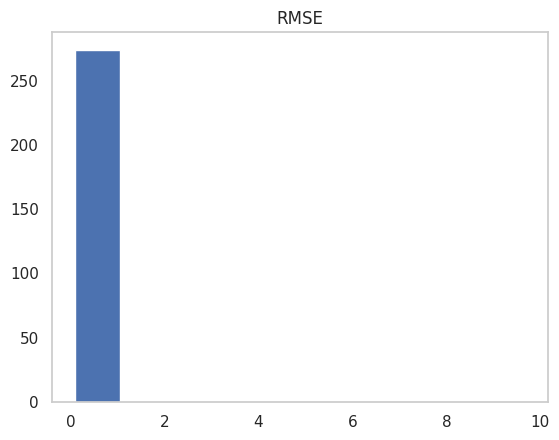

In [9]:
ax = df.hist(column='RMSE', grid=False)

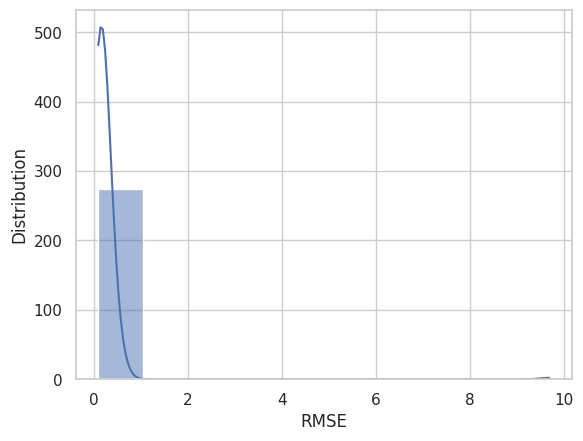

In [10]:
sns.set(style="whitegrid")

ax = sns.histplot(data=df, x='RMSE', kde=True, bins=10)

ax.set_ylabel('Distribution')

plt.show()

# Select the best data

In [11]:
mu = df['RMSE'].mean()
std = df['RMSE'].std()

print(f"mean: {round(mu, 2)}")
print(f"standard deviation: {round(std, 2)}")

mean: 0.21
standard deviation: 0.58


In [12]:
subset = df[(df["RMSE"] < mu + 2*std) & ( df["R2"] >0)]
subset.sort_values(by=['R2'], inplace=True, ascending=False)

subset = subset.iloc[:5]

subset

<ipython-input-12-402a4b7284b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.sort_values(by=['R2'], inplace=True, ascending=False)


,R2,MAE,RMSE,Hidden Units,Learning Rate,Number of Epochs,Number of Iterations
137,0.579870,0.060534,0.090111,256,0.001,300,30
98,0.553662,0.064215,0.092879,256,0.001,200,40
254,0.551305,0.062717,0.093124,256,0.001,400,30
32,0.548375,0.065263,0.093428,128,0.001,200,30
166,0.547753,0.063427,0.093492,64,0.001,300,40
